     frequency  real  imaginary  magnitude          gain
0         5000   137      -1929   50067.16  1.032800e-08
1         5000   135      -1928   50096.65  1.032800e-08
2         5000   136      -1927   50120.70  1.032800e-08
3         5000   132      -1927   50127.90  1.032800e-08
4         5000   134      -1927   50124.33  1.032800e-08
..         ...   ...        ...        ...           ...
195     100000  1679        220   50547.66  1.168300e-08
196     100000  1685        215   50389.67  1.168300e-08
197     100000  1685        216   50385.91  1.168300e-08
198     100000  1669        215   50864.89  1.168300e-08
199     100000  1684        216   50415.34  1.168300e-08

[200 rows x 5 columns]


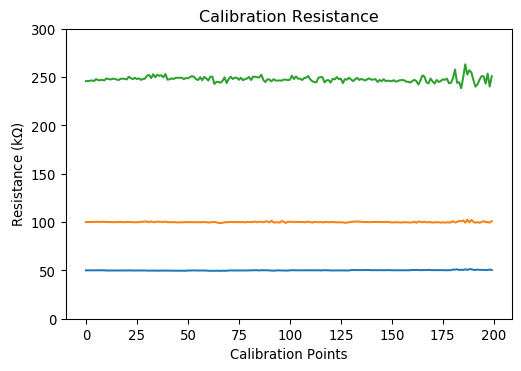

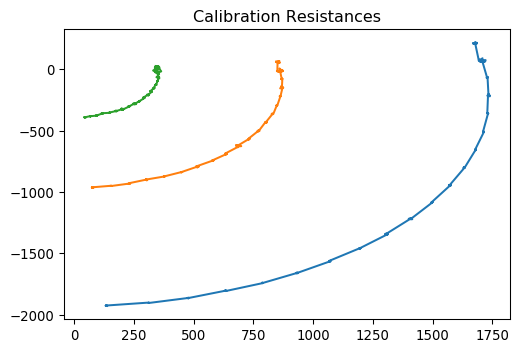

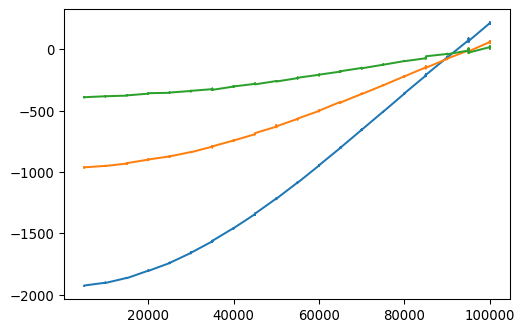

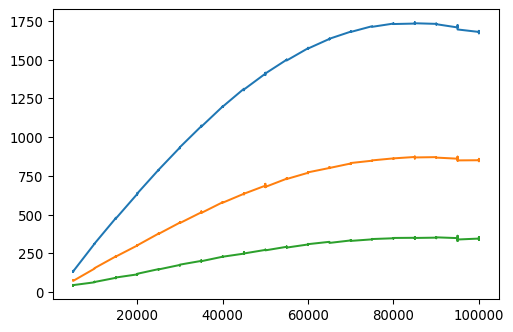

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

import os
import datetime, time
import sys

mpl.rcParams['figure.dpi']= 96

# dir_path = os.path.dirname(os.path.realpath(__file__))

res50 = pd.read_csv("resister-50k.txt", names = ["frequency", "real", "imaginary", "magnitude", "gain"])
res100 = pd.read_csv("resister-100k.txt", names = ["frequency", "real", "imaginary", "magnitude", "gain"])
res250 = pd.read_csv("resister-250k.txt", names = ["frequency", "real", "imaginary", "magnitude", "gain"])

print("{}".format(res50))

plt.figure()
plt.plot(np.divide(res50["magnitude"],1000))
plt.plot(np.divide(res100["magnitude"],1000))
plt.plot(np.divide(res250["magnitude"],1000))
plt.title("Calibration Resistance")
plt.xlabel("Calibration Points")
plt.ylabel("Resistance (k$\Omega$)")
plt.ylim(0, 300)

plt.figure()
plt.plot(res50["real"], res50["imaginary"])
plt.plot(res100["real"], res100["imaginary"]) 
plt.plot(res250["real"], res250["imaginary"])
plt.title("Calibration Resistances")

plt.figure()
plt.plot(res50["frequency"], res50["imaginary"])
plt.plot(res100["frequency"], res100["imaginary"]) 
plt.plot(res250["frequency"], res250["imaginary"])

plt.figure()
plt.plot(res50["frequency"], res50["real"])
plt.plot(res100["frequency"], res100["real"]) 
plt.plot(res250["frequency"], res250["real"])

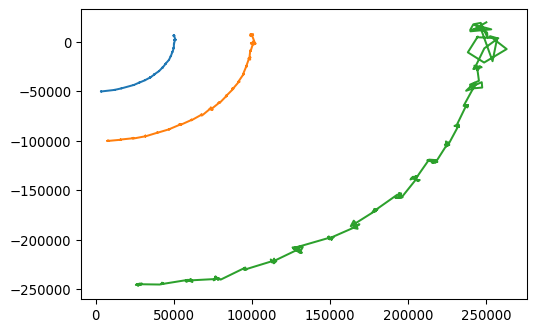

In [13]:
angle_diff050 = np.arctan(np.divide(res50["imaginary"], res50["real"]))
angle_diff100 = np.arctan(np.divide(res100["imaginary"], res100["real"]))
angle_diff250 = np.arctan(np.divide(res250["imaginary"], res250["real"]))

Z_R050 = np.multiply(res50["magnitude"], np.cos(angle_diff050))
Z_I050 = np.multiply(res50["magnitude"], np.sin(angle_diff050))

Z_R100 = np.multiply(res100["magnitude"], np.cos(angle_diff100))
Z_I100 = np.multiply(res100["magnitude"], np.sin(angle_diff100))

Z_R250 = np.multiply(res250["magnitude"], np.cos(angle_diff250))
Z_I250 = np.multiply(res250["magnitude"], np.sin(angle_diff250))

plt.figure()
plt.plot(Z_R050, Z_I050)
plt.plot(Z_R100, Z_I100)
plt.plot(Z_R250, Z_I250)

Text(0, 0.5, 'Imaginary')

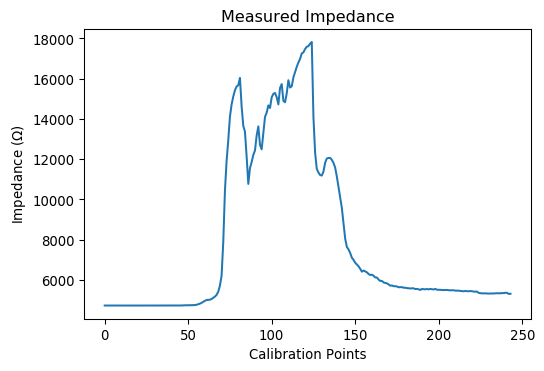

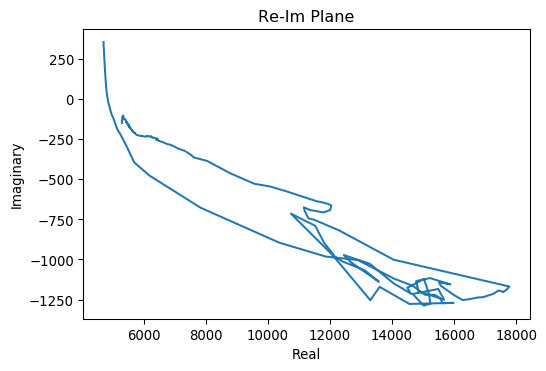

In [34]:
C1_GW_I_1 = pd.read_csv("catheter1-jello-water-infiltrate-1.txt", names = ["frequency", "real", "imaginary", "phase", "magnitude", "gain"])

plt.figure()
plt.plot(np.arange(0, len(C1_GW_I_1["magnitude"])),C1_GW_I_1["magnitude"])
plt.title("Measured Impedance")
plt.xlabel("Calibration Points")
plt.ylabel("Impedance ($\Omega$)")

plt.figure()
plt.plot(C1_GW_I_1["real"],C1_GW_I_1["imaginary"])
plt.title("Re-Im Plane")
plt.xlabel("Real")
plt.ylabel("Imaginary")


Text(0.5, 0, 'Real')

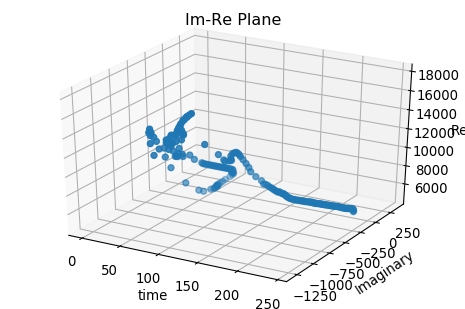

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.arange(0, len(C1_GW_I_1["magnitude"])), C1_GW_I_1["imaginary"],C1_GW_I_1["real"], 'o')
ax.set_title("Im-Re Plane")
ax.set_xlabel("time")
ax.set_ylabel("Imaginary")
ax.set_zlabel("Real")


Text(0, 0.5, 'Imaginary')

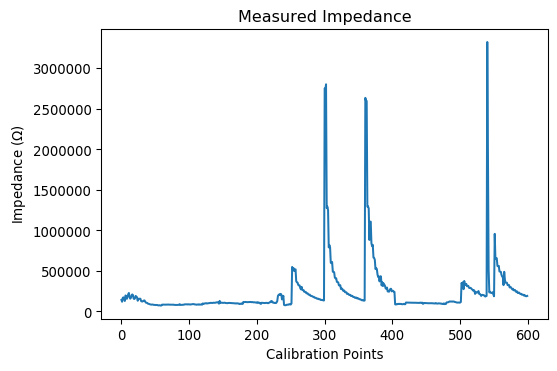

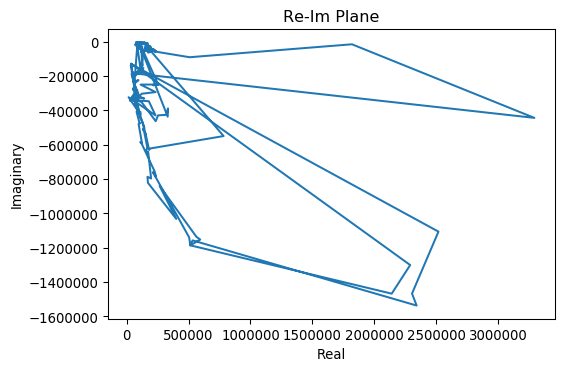

In [40]:
C2_W_S_1 = pd.read_csv("catheter2-water-sweep-offset-10k-2.txt", names = ["frequency", "real", "imaginary", "phase", "magnitude", "gain"])

plt.figure()
plt.plot(np.arange(0, len(C2_W_S_1["magnitude"])),C2_W_S_1["magnitude"])
plt.title("Measured Impedance")
plt.xlabel("Calibration Points")
plt.ylabel("Impedance ($\Omega$)")

plt.figure()
plt.plot(C2_W_S_1["real"],C2_W_S_1["imaginary"])
plt.title("Re-Im Plane")
plt.xlabel("Real")
plt.ylabel("Imaginary")

Text(0, 0.5, 'Imaginary')

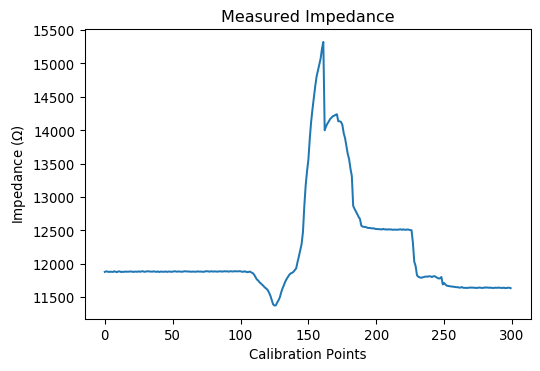

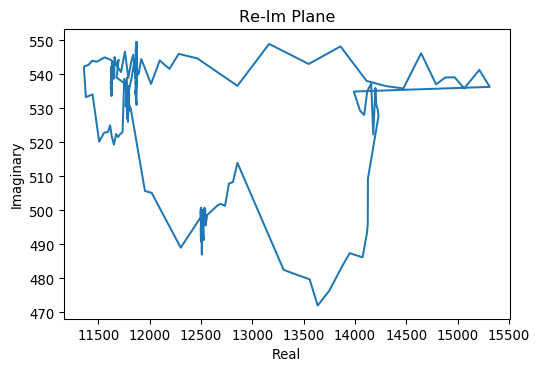

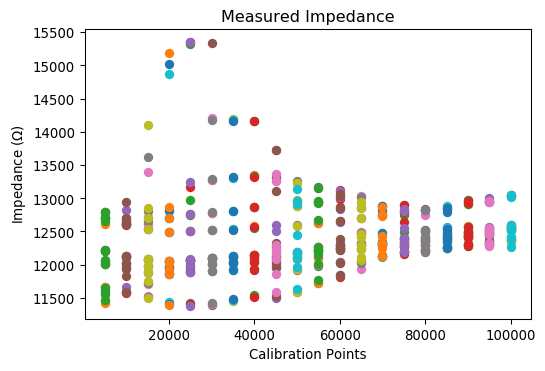

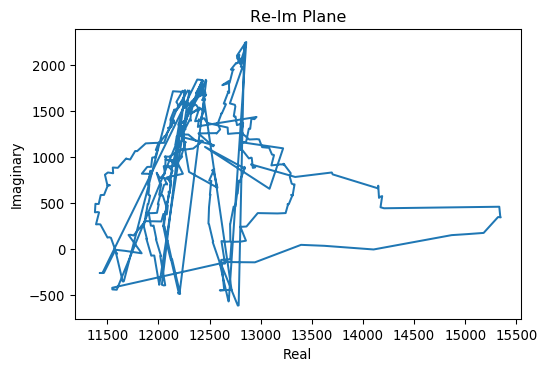

In [55]:
C2_GW_SI_I_1 = pd.read_csv("catheter2-infiltration-single-offset-10k.txt", names = ["frequency", "real", "imaginary", "phase", "magnitude", "gain"])
C2_GW_SW_I_1 = pd.read_csv("catheter2-infiltration-sweep-offset-10k-1.txt", names = ["frequency", "real", "imaginary", "phase", "magnitude", "gain"])

plt.figure()
plt.plot(np.arange(0, len(C2_GW_SI_I_1["magnitude"])),C2_GW_SI_I_1["magnitude"])
plt.title("Measured Impedance")
plt.xlabel("Calibration Points")
plt.ylabel("Impedance ($\Omega$)")

plt.figure()
plt.plot(C2_GW_SI_I_1["real"],C2_GW_SI_I_1["imaginary"])
plt.title("Re-Im Plane")
plt.xlabel("Real")
plt.ylabel("Imaginary")

plt.figure()
plt.plot(np.resize(C2_GW_SW_I_1["frequency"], (10, 60)),np.resize(C2_GW_SW_I_1["magnitude"], (10, 60)), 'o')
plt.title("Measured Impedance")
plt.xlabel("Calibration Points")
plt.ylabel("Impedance ($\Omega$)")

plt.figure()
plt.plot(C2_GW_SW_I_1["real"],C2_GW_SW_I_1["imaginary"])
plt.title("Re-Im Plane")
plt.xlabel("Real")
plt.ylabel("Imaginary")